<a href="https://colab.research.google.com/github/navyasreekilari/Analysis-on-trending-video-Data-Mining-/blob/main/Copy_of_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
id = ['O', 'J', 'D', 'A', 'I', 'G', 'B', 'M', 'F', 'L', 'K', 'P', 'Q', 'C', 'N', 'H', 'R', 'E']
Labels = ['a', 'a', 'd', 'a', 'd', 'a', 'a', 'd', 'd', 'a', 'd', 'd', 'd', 'd', 'a', 'd', 'd', 'd']
scores = [0.03, 0.08, 0.10, 0.11, 0.22, 0.32, 0.35, 0.42, 0.44, 0.48, 0.56, 0.65, 0.71, 0.72, 0.73, 0.80, 0.82, 0.99]
TPR_Values = []
FPR_Values = []
for threshold in scores:
    TP = sum((scores[i] >= threshold) and (Labels[i] == 'd') for i in range(len(id)))
    FP = sum((scores[i] >= threshold) and (Labels[i] == 'a') for i in range(len(id)))
    TN = sum((scores[i] < threshold) and (Labels[i] == 'a') for i in range(len(id)))
    FN = sum((scores[i] < threshold) and (Labels[i] == 'd') for i in range(len(id)))
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TPR_Values.append(TPR)
    FPR_Values.append(FPR)
print('TPR-values==',TPR_Values)
print('FPR-values==',FPR_Values)

TPR-values== [1.0, 1.0, 1.0, 0.9090909090909091, 0.9090909090909091, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.7272727272727273, 0.6363636363636364, 0.6363636363636364, 0.5454545454545454, 0.45454545454545453, 0.36363636363636365, 0.2727272727272727, 0.2727272727272727, 0.18181818181818182, 0.09090909090909091]
FPR-values== [1.0, 0.8571428571428571, 0.7142857142857143, 0.7142857142857143, 0.5714285714285714, 0.5714285714285714, 0.42857142857142855, 0.2857142857142857, 0.2857142857142857, 0.2857142857142857, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.0, 0.0, 0.0]


Above are the caluclated TPR and FPR values for all values.

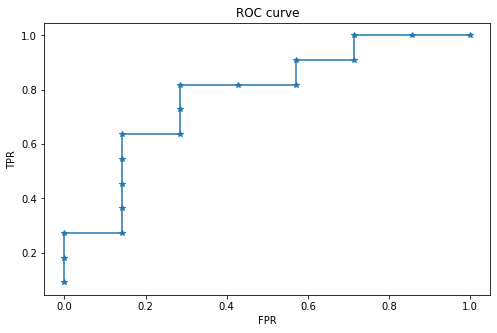

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(FPR_Values, TPR_Values, '-*')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Above is the ROC curve obtained from FPR on x-axis and TPR on y-axis.

1.3)

Yes, by selecting additional threshold values, we may build the ROC curve with a higher level of resolution. As we utilize additional threshold values, the ROC curve becomes more accurate. There is a limit to the number of threshold values we can employ, though, because the curve needs a sufficient number of data points to be properly represented. Increasing the number of threshold values close to the decision border by using a logarithmic scale or a set number of threshold values is a common approach in practice.

In [ ]:
from sklearn.metrics import auc
AUC_Score = auc(FPR_Values, TPR_Values)
print("AUC_Value=", AUC_Score)

AUC_Value= 0.7792207792207793


Above, is the caluclated AUC value.

In [ ]:
import seaborn as sns
df = sns.load_dataset('iris')
df
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
df = sns.load_dataset('iris')
X = df[['petal_width', 'petal_length', 'sepal_width', 'sepal_length']].values
y = df['species'].values
x_tr, x_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=0)
sclr = StandardScaler()
x_tr = sclr.fit_transform(x_tr)
x_te = sclr.transform(x_te)
KNN = KNeighborsClassifier(n_neighbors=5)
kf = KFold(n_splits=5, shuffle=True, random_state=45)
accurate_scores = []
for train_index, val_index in kf.split(x_tr):
    X_fold_train, X_fold_val = x_tr[train_index], x_tr[val_index]
    y_fold_train, y_fold_val = y_tr[train_index], y_tr[val_index]
    KNN.fit(X_fold_train, y_fold_train)
    y_pred = KNN.predict(X_fold_val)
    accurate_score = accuracy_score(y_fold_val, y_pred)
    accurate_scores.append(accurate_score)
print('Scores accurate value are:', accurate_scores)
mean_of_score = np.mean(accurate_scores)
print("Mean value of all accuracy scores is {:.2f}".format(mean_of_score))

Scores accurate value are: [0.9583333333333334, 0.8333333333333334, 1.0, 0.9166666666666666, 1.0]
Mean value of all accuracy scores is 0.94


Above, is the implememnted KNN method on classifying the data.